# 1.)


## Income quintile share ratio
Maß für die Ungleichverteilung der Einkommensverteilung. <br>
Berechnung: Gesamteinkommen der 20% mit dem höchsten Einkommen (Top quintile) zum Verhältnis der 20% mit dem niedrigsten Einkommen (unterstes Quintil).

## Gini-Koeffizient
Maß zur Darstellung der Ungleichheit einer Verteilung, am häufigsten eingesetzt bei Vermögensverteilungen. Kann Werte zwischen 0 und 1 annehmen. Dabei gilt: Je höher der Koeffizient, desto ungleicher die Verteilung. Wert = 0 bedeutet, alle haben gleiches Vermögen, Wert = 1 bedeutet, nur eine Person hat gesamtes Vermögen.
Berechnung: $ GUK = 2A = \sum_{i=1}^{n} l_i \frac{2i-n-1}{n} = \frac{1}{n²\mu}\sum_{i=1}^{n}x_i(2i-n-1) $, wobei $ \mu $ das arithmetische Mittel für eine aufsteigend, sortiertere diskrete Größe $ x = x_1, ..., x_n. $ 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2.)

In [2]:
# Read in titanic dataset.
df = pd.read_csv("resources/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
def qsr(values):
    values_sorted = np.sort(values)
    p20 = np.percentile(values_sorted, 20)
    p80 = np.percentile(values_sorted, 80)
    higher_sum = np.sum(values_sorted[values_sorted >= p80])
    lower_sum = np.sum(values_sorted[values_sorted <= p20])

    return higher_sum / lower_sum

In [4]:
def gini(values):
    values_sorted = np.sort(values) # Sort values as this formula requires sorted values.
    mean = np.mean(values_sorted)
    n = len(values_sorted)
    coefficent = 1 / (n**2 * mean)
    sum = 0
    for i in range(n):
        x = values_sorted[i]
        factor = 2* (i + 1) - n - 1 # We're indexing from zero, the formula requires start from i = 1.
        sum += x * factor
    return coefficent * sum

# 3.)

In [5]:
# Get features.
age = df.loc[:, "Age"].dropna()
fare = df.loc[:, "Fare"].dropna()

## Gini

In [6]:
gini_age = gini(age.values)
gini_fare = gini(fare.values)

print("Gini for age: " + str(gini_age))
print("Gini for fare: " + str(gini_fare))

Gini for age: 0.2725166909345052
Gini for fare: 0.5703479299522444


## QSR

In [7]:
qsr_age = qsr(age.values)
qsr_fare = qsr(fare.values)

print("QSR for age: " + str(qsr_age))
print("QSR for fare: " + str(qsr_fare))

QSR for age: 3.8576453043004677
QSR for fare: 14.98476984290354


# 4.)

## Bedeutet ein höherer Wert jeweils mehr oder weniger Ungleichheit? ##
Mehr.

# 5.)

## Statistik auf Statista aus dem Jahr 2019 bzgl. des Gini-Index:
<a href="https://de.statista.com/statistik/daten/studie/942729/umfrage/ranking-der-eu-laender-nach-einkommensungleichheit-im-gini-index/" rel="nofollow"><img src="https://de.statista.com/graphic/1/942729/ranking-der-eu-laender-nach-einkommensungleichheit-im-gini-index.jpg" alt="Statistik: Europäische Union¹: Ranking der Mitgliedsländer und Beitrittskandidaten nach Ungleichheit bei der Einkommensverteilung auf Basis des Gini-Index im Jahr 2019 | Statista" style="width: 100%; height: auto !important; max-width:1000px;-ms-interpolation-mode: bicubic;"/></a><br />Mehr Statistiken finden Sie bei  <a href="https://de.statista.com" rel="nofollow">Statista</a>

## Deutschland dabei im Mttelfeld.

## <a href="https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=ilc_di11&lang=en">QSR Werte über die Jahre verteilt:</a>

In [8]:
qsr = pd.read_csv("resources/qsr.csv")
qsr

,TIME,GEO,AGE,SEX,UNIT,Value
0,2011,"European Union (EU6-1958, EU9-1973, EU10-1981,...",Total,Total,Ratio,5.03
1,2011,European Union - 27 countries (from 2020),Total,Total,Ratio,4.99
2,2011,European Union - 28 countries (2013-2020),Total,Total,Ratio,5.03
3,2011,European Union - 27 countries (2007-2013),Total,Total,Ratio,5.03
4,2011,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",Total,Total,Ratio,4.98
...,...,...,...,...,...,...
435,2020,North Macedonia,Total,Total,Ratio,:
436,2020,Albania,Total,Total,Ratio,:
437,2020,Serbia,Total,Total,Ratio,:
438,2020,Turkey,Total,Total,Ratio,:


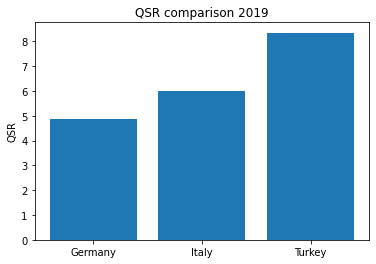

In [9]:
# Examine year 2019.
qsr2019 = qsr[qsr["TIME"] == 2019]
qsr2019_truncated = qsr2019[["GEO", "Value"]]

qsrcountries2019 = qsr2019_truncated[ (qsr2019["GEO"] == "Germany (until 1990 former territory of the FRG)") | (qsr2019["GEO"] == "Italy") | (qsr2019["GEO"] == "Turkey")]
qsrcountries2019 = qsrcountries2019.replace("Germany (until 1990 former territory of the FRG)", "Germany")

countries = qsrcountries2019.loc[:, "GEO"]
values = qsrcountries2019.loc[:, "Value"].astype(float)
xpos = np.arange(len(countries))

fig, ax = plt.subplots()
ax.bar(xpos, values)
ax.set_ylabel("QSR")
ax.set_xticks(xpos)
ax.set_xticklabels(countries)
ax.set_title("QSR comparison 2019")
plt.show()


